In [99]:
import pandas as pd
import csv
import re
import numpy as np
import random

from datetime import datetime
from numpy import int64

pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns

from collections import Counter # Keep track of our term counts
import json # For parsing json

from sqlalchemy import create_engine, text
from datetime import datetime

import datetime as dt

import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler

import configparser

In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPClassifier
#from lime.lime_tabular import LimeTabularExplainer


import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib

%matplotlib inline

In [68]:
df1 = pd.read_csv('mega.csv')
df1

,Unnamed: 0.1,Unnamed: 0,ID,ActionTime,Website,BannerSize,Brand,colour,InteractionTime,Date,...,Date_year,Date_month,Date_day,Date_hour,Date_Min,Date_Second,Action_Click,Action_View,weekday,month
0,0,1,AMsySZbNg8SBwPtj7IGHnip_8aY0,1508761859495365,Facebook,300x600,Carter's,Pink,0.17,2017-10-23 12:30:59.495365,...,2017,10,23,12,30,59,0,1,Monday,10
1,1,2,AMsySZZcUFNGOJs-lfC9j-ZDlV7Z,1502847469736117,Facebook,300x250,Burberry,Red,4.30,2017-08-16 01:37:49.736117,...,2017,8,16,1,37,49,0,1,Wednesday,8
2,2,3,AMsySZYoK8_bD0hGv4zu0iRn1TFo,1514169431528120,Facebook,728x90,Disney,Yellow,0.87,2017-12-25 02:37:11.528120,...,2017,12,25,2,37,11,0,1,Monday,12
3,3,4,AMsySZahxpwLOWnMJj6RGATgwEOc,1515527952591896,Facebook,320x50,Carter's,Yellow,0.80,2018-01-09 19:59:12.591896,...,2018,1,9,19,59,12,0,1,Tuesday,1
4,4,5,AMsySZbqgfMBDtAqZz1jVRaOmX00,1507514809374045,instagram.com,300x250,Gap,Gold,0.63,2017-10-09 02:06:49.374045,...,2017,10,9,2,6,49,0,1,Monday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999996,AMsySZY-9Mzh_xjk57_PBNO_8QRO,1508108130372165,instagram.com,300x250,Old Navy,Yellow,0.05,2017-10-15 22:55:30.372165,...,2017,10,15,22,55,30,0,1,Sunday,10
999996,999996,999997,AMsySZY-KoDAx1qJv15SZ9lKO2QF,1516760241253562,Twitter,320x480,JoeFresh,Yellow,0.06,2018-01-24 02:17:21.253562,...,2018,1,24,2,17,21,0,1,Wednesday,1
999997,999997,999998,AMsySZZGRYHeXVjPP2Rr6F-kjFc3,1502841951670170,Other,300x250,JoeFresh,Pink,0.03,2017-08-16 00:05:51.670170,...,2017,8,16,0,5,51,0,1,Wednesday,8
999998,999998,999999,AMsySZaSAhXiCSGhaCLWcoLse-0i,1517068511614322,Facebook,300x250,Old Navy,Pink,0.45,2018-01-27 15:55:11.614322,...,2018,1,27,15,55,11,0,1,Saturday,1


In [72]:
df1 = df1.drop(df1.columns[0], axis=1)

In [73]:
df1

,ID,ActionTime,Website,BannerSize,Brand,colour,InteractionTime,Date,Date_YMD,Date_YM,Date_year,Date_month,Date_day,Date_hour,Date_Min,Date_Second,Action_Click,Action_View,weekday,month
0,AMsySZbNg8SBwPtj7IGHnip_8aY0,1508761859495365,Facebook,300x600,Carter's,Pink,0.17,2017-10-23 12:30:59.495365,2017-10-23,2017-10-01,2017,10,23,12,30,59,0,1,Monday,10
1,AMsySZZcUFNGOJs-lfC9j-ZDlV7Z,1502847469736117,Facebook,300x250,Burberry,Red,4.30,2017-08-16 01:37:49.736117,2017-08-16,2017-08-01,2017,8,16,1,37,49,0,1,Wednesday,8
2,AMsySZYoK8_bD0hGv4zu0iRn1TFo,1514169431528120,Facebook,728x90,Disney,Yellow,0.87,2017-12-25 02:37:11.528120,2017-12-25,2017-12-01,2017,12,25,2,37,11,0,1,Monday,12
3,AMsySZahxpwLOWnMJj6RGATgwEOc,1515527952591896,Facebook,320x50,Carter's,Yellow,0.80,2018-01-09 19:59:12.591896,2018-01-09,2018-01-01,2018,1,9,19,59,12,0,1,Tuesday,1
4,AMsySZbqgfMBDtAqZz1jVRaOmX00,1507514809374045,instagram.com,300x250,Gap,Gold,0.63,2017-10-09 02:06:49.374045,2017-10-09,2017-10-01,2017,10,9,2,6,49,0,1,Monday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,AMsySZY-9Mzh_xjk57_PBNO_8QRO,1508108130372165,instagram.com,300x250,Old Navy,Yellow,0.05,2017-10-15 22:55:30.372165,2017-10-15,2017-10-01,2017,10,15,22,55,30,0,1,Sunday,10
999996,AMsySZY-KoDAx1qJv15SZ9lKO2QF,1516760241253562,Twitter,320x480,JoeFresh,Yellow,0.06,2018-01-24 02:17:21.253562,2018-01-24,2018-01-01,2018,1,24,2,17,21,0,1,Wednesday,1
999997,AMsySZZGRYHeXVjPP2Rr6F-kjFc3,1502841951670170,Other,300x250,JoeFresh,Pink,0.03,2017-08-16 00:05:51.670170,2017-08-16,2017-08-01,2017,8,16,0,5,51,0,1,Wednesday,8
999998,AMsySZaSAhXiCSGhaCLWcoLse-0i,1517068511614322,Facebook,300x250,Old Navy,Pink,0.45,2018-01-27 15:55:11.614322,2018-01-27,2018-01-01,2018,1,27,15,55,11,0,1,Saturday,1


In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 49 columns):
 #   Column                      Non-Null Count    Dtype
---  ------                      --------------    -----
 0   Action_View                 1000000 non-null  int64
 1   Website_AOL                 1000000 non-null  int64
 2   Website_Amazon              1000000 non-null  int64
 3   Website_Atedra              1000000 non-null  int64
 4   Website_Craigslist.ca       1000000 non-null  int64
 5   Website_Expedia             1000000 non-null  int64
 6   Website_Facebook            1000000 non-null  int64
 7   Website_Kijiji              1000000 non-null  int64
 8   Website_Other               1000000 non-null  int64
 9   Website_Sympatico           1000000 non-null  int64
 10  Website_TubeMogul           1000000 non-null  int64
 11  Website_Twitter             1000000 non-null  int64
 12  Website_Wayfair             1000000 non-null  int64
 13  Website_Weather             

In [75]:
X = df1.drop(columns= ['ID', 'ActionTime', 'Action_Click', 'Date_YMD', 'Date_YM', 'Date', 'Date_year', 'Date_month', 'Date_day', 'Date_hour', 'Date_Min', 'Date_Second', 'weekday', 'month'])

In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Website          1000000 non-null  object 
 1   BannerSize       1000000 non-null  object 
 2   Brand            1000000 non-null  object 
 3   colour           1000000 non-null  object 
 4   InteractionTime  1000000 non-null  float64
 5   Action_View      1000000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 45.8+ MB


In [77]:
y = df1['Action_Click']

In [78]:
y.value_counts()

0    999756
1       244
Name: Action_Click, dtype: int64

In [79]:
X = pd.get_dummies(X, columns=['Website', 'BannerSize', 'Brand', 'colour'], dtype=int)

I applied PCA to drop most of features

In [80]:
from sklearn.decomposition import PCA
pca = PCA()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_pca = pca.fit_transform(X)

In [81]:
X_pca

array([[-8.25921499e-01, -5.49105785e-02,  7.32999665e-01, ...,
         1.71858014e-16, -2.60362042e-17,  6.43687554e-17],
       [ 3.30431249e+00, -7.48747761e-01, -2.30008024e-01, ...,
         1.26671297e-16,  4.23371176e-16, -3.42589642e-16],
       [-1.31438412e-01, -1.21882589e-02, -5.09663819e-01, ...,
         8.63685237e-17, -3.08502988e-15, -4.16599515e-15],
       ...,
       [-9.72481297e-01,  7.25687693e-02,  7.50852945e-01, ...,
         8.19601051e-17,  1.72451786e-17,  7.22372174e-17],
       [-5.44495223e-01, -7.39767180e-01,  7.47500946e-01, ...,
        -7.98287226e-17,  2.68293533e-17, -5.50228957e-18],
       [ 1.41329525e+00,  9.16273580e-01,  7.34085940e-01, ...,
        -1.05042909e-16, -5.18007560e-17,  2.51091659e-17]])

In [82]:
X_pca.shape

(1000000, 50)

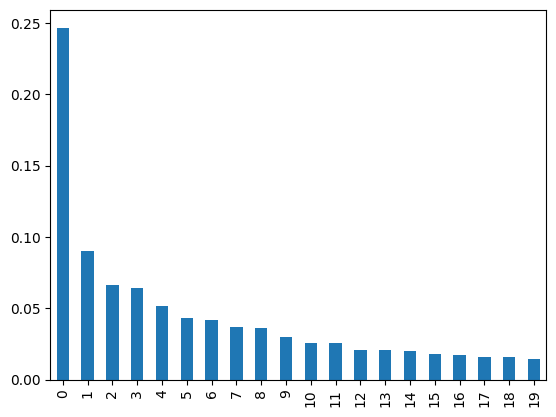

In [83]:
pd.Series(pca.explained_variance_ratio_).head(20).plot(kind='bar');

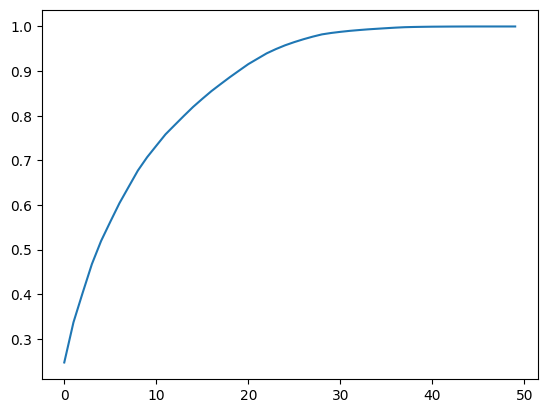

In [84]:
pd.Series(pca.explained_variance_ratio_.cumsum()).plot(kind='line');

Case: chosing only one feature

In [85]:
# int is how many principle components you want to keep

pca = PCA(1)

X_pca = pca.fit_transform(X)

X_pca.shape

(1000000, 1)

In [88]:
# decimal for how much explained variance you want to maintain

pca = PCA(.9)

X_pca = pca.fit_transform(X)

X_pca.shape

(1000000, 20)

Although to reach to good accuracy, that recommended to choose 20 features, but I chose again one feature

In [90]:
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pca = PCA(1)

pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

In [91]:
X_pca_train.shape

(670000, 1)

In [92]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_pca_train, y_train)

LogisticRegression(random_state=42)

In [93]:
lr.score(X_pca_test, y_test)

0.9997272727272727

In [94]:
scores = []
for x in range(1, 2):
    pca = PCA(x, random_state=42)
    pca.fit(X_train)
    X_pca_train = pca.transform(X_train)
    X_pca_test = pca.transform(X_test)

    lr = LogisticRegression(random_state=42)
    lr.fit(X_pca_train,y_train)

    scores.append(lr.score(X_pca_test, y_test))

In [95]:
len(scores)

1

In [96]:
scores

[0.9997272727272727]

It is data leakage because the dataset is a very imbalanced

In [100]:
from imblearn.datasets import fetch_datasets
from imblearn.over_sampling import RandomOverSampler


I'll chose Logistic regrestion

In [148]:
#Split data
#Split the data set into train and test set with the first 70% of the data for training and the remaining 30% for testing.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [150]:


ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [151]:
# Lasso regression
# First, we apply lasso regression on the training set with an arbitrarily regularization parameter
# α of 1.

from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_resampled, y_resampled)


Lasso(alpha=1)

In [152]:
Lasso(alpha=1)

Lasso(alpha=1)

In [153]:
# Model evaluation


print('R squared training set', round(reg.score(X_resampled, y_resampled)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 99.65
R squared test set -183.26


In [154]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_resampled)
mse_train = mean_squared_error(y_resampled, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))



MSE training set 0.0
MSE test set 0.0


Role of alpha
To better understand the role of alpha, we plot the lasso coefficients as a function of alpha (max_iter are the maximum number of iterations):

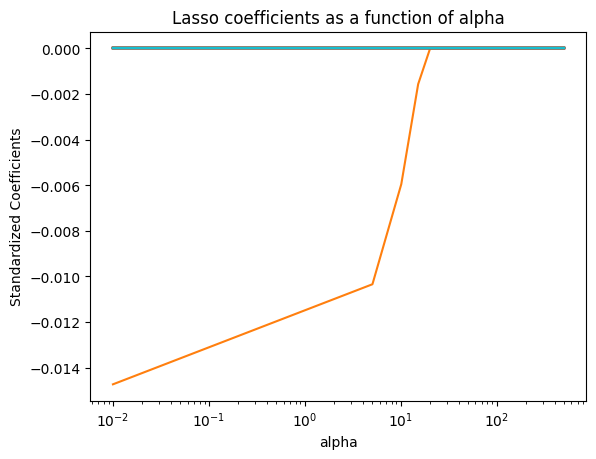

In [156]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_resampled, y_resampled)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

Remember that if alpha = 0, then the lasso gives the least squares fit, and when alpha becomes very large, the lasso gives the null model in which all coefficient estimates equal zero.

Moving from left to right in our plot, we observe that at first the lasso models contains many predictors with high magnitudes of coefficient estimates. With increasing alpha, the coefficient estimates approximate towards zero.

Next, we use cross-validation to find the best value for alpha.

Lasso with optimal alpha
To find the optimal value of alpha, we use scikit learns lasso linear model with iterative fitting along a regularization path (LassoCV). The best model is selected by cross-validation.

k-fold cross validation

In [157]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_resampled, y_resampled)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [158]:
LassoCV(cv=5, max_iter=10000, random_state=0)

LassoCV(cv=5, max_iter=10000, random_state=0)

Show best value of penalization chosen by cross validation:

In [159]:
model.alpha_

0.016967364584429632

Best model
Use best value for our final model:

In [160]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_resampled, y_resampled)

Lasso(alpha=0.016967364584429632)

In [161]:
Lasso(alpha=0.016967364584429632)

Lasso(alpha=0.016967364584429632)

Show model coefficients and names:

In [162]:
print(list(zip(lasso_best.coef_, X)))

[(0.0, 'InteractionTime'), (-0.014719433814035137, 'Action_View'), (-0.0, 'Website_AOL'), (0.0, 'Website_Amazon'), (-0.0, 'Website_Atedra'), (-0.0, 'Website_Craigslist.ca'), (0.0, 'Website_Expedia'), (0.0, 'Website_Facebook'), (0.0, 'Website_Kijiji'), (0.0, 'Website_Other'), (-0.0, 'Website_Sympatico'), (0.0, 'Website_TubeMogul'), (-0.0, 'Website_Twitter'), (-0.0, 'Website_Wayfair'), (-0.0, 'Website_Weather'), (-0.0, 'Website_Yahoo'), (-0.0, 'Website_Youtube'), (-0.0, 'Website_instagram.com'), (-0.0, 'BannerSize_1200x627'), (-0.0, 'BannerSize_1536x2048'), (0.0, 'BannerSize_160x600'), (0.0, 'BannerSize_1x1'), (-0.0, 'BannerSize_300x250'), (0.0, 'BannerSize_300x50'), (-0.0, 'BannerSize_300x600'), (-0.0, 'BannerSize_320x100'), (-0.0, 'BannerSize_320x480'), (-0.0, 'BannerSize_320x50'), (0.0, 'BannerSize_728x90'), (0.0, 'BannerSize_750x125'), (-0.0, 'BannerSize_768x1024'), (-0.0, 'BannerSize_Other'), (-0.0, 'BannerSize_other'), (-0.0, 'Brand_Banana Republic'), (0.0, 'Brand_Burberry'), (0.0,

In [163]:
# Model evaluation
print('R squared training set', round(lasso_best.score(X_resampled, y_resampled)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 100.0
R squared test set 99.92


In [164]:
mean_squared_error(y_test, lasso_best.predict(X_test))

2.500000001726066e-07

Lasso path: plot results of cross-validation with mean squared erros

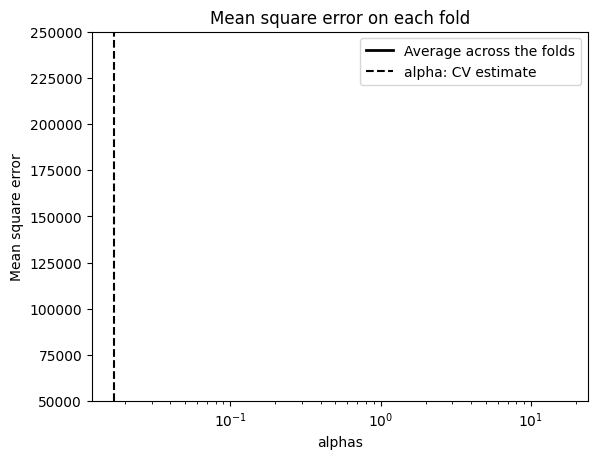

In [165]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);

In [169]:
from sklearn.model_selection import GridSearchCV


# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_resampled, y_resampled)

# Print best parameter values and score
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

Best Parameters: {'alpha': 0.001}
Best Score: 0.5999972196129804


# Notes:
- I applied many alograthims the data is leakage. 
- then I used one feature to see why the data is leakage, but still the same.
- The details on the second file, (Test3_b_py_Ameenah).
- I applied PCA, and used only one feature, but still the same
- I applied LASSO algorithm, it changed a little.
- the data showed as overvitting, but actually I think the data is flawed because it is very imbalanced and insufficient data.